In [1]:
import numpy as np
import os
import pandas
import pytest
import sys

from ase import io
from ase.visualize import view
import nglview as ngl

sys.path.append("../")
from graphene_analysis import analysis

import matplotlib.pyplot as plt

/Users/Fabsilein/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
path = "../tests/files/trajectories/divacancy_36/"

simulation = analysis.Simulation(path,"Divacancy 36")
simulation.read_in_simulation_data()
simulation.set_sampling_times(
            start_time=0, end_time=-1, frame_frequency=1, time_between_frames=100
        )

simulation.find_defective_atoms()
simulation.find_atoms_around_defects_within_cutoff()

Using the topology from ../tests/files/trajectories/divacancy_36/npt.pdb.
Creating universes for ../tests/files/trajectories/divacancy_36/npt.dcd.
SUCCESS: New sampling times.
Start time: 	 	0 	 fs
End time: 	 	1700 	 fs
Time between frames: 	100 	 fs
Frame frequency: 	1


/Users/Fabsilein/.pyenv/versions/3.9.1/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/Users/Fabsilein/.pyenv/versions/3.9.1/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/Users/Fabsilein/.pyenv/versions/3.9.1/lib/python3.9/site-packages/

In [5]:
invariant_positions = simulation.compute_local_environments_geometry()

  0%|          | 0/17 [00:00<?, ?it/s]

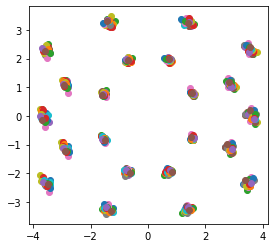

In [7]:
fig, ax = plt.subplots(1,1)

for count,defect in enumerate(invariant_positions):
    
    ax.scatter(defect[:,0],defect[:,1])

#ax.scatter(invariant_positions[10][:,0],invariant_positions[10][:,1])


ax.set_aspect('equal')

In [16]:
view(simulation.topology[simulation.defective_atoms_ids_clustered[3]])

<Popen: returncode: None args: ['/Users/Fabsilein/.pyenv/versions/3.9.1/bin/...>

In [12]:
simulation.orientations_per_defect

array([1.57079633, 1.57079633, 0.52363049, 0.52363049, 1.57079633,
       1.57079633, 1.57079633, 0.52352867, 1.57079633, 0.52357941,
       0.52371815, 0.52352848, 1.57079633, 1.57079633, 0.52352867,
       0.52357943, 0.52366729, 0.52361655, 1.57079633, 0.52357931,
       0.52375531, 1.57079633, 0.52352875, 0.52362982, 1.57079633,
       0.52352901, 0.52380626, 0.52363049, 0.52366753, 0.52352881,
       0.52357868, 0.52352833, 1.57079633, 1.57079633, 0.52352901,
       0.52352833])

In [15]:
view(simulation.topology[simulation.defective_atoms_ids_clustered[2]])

<Popen: returncode: None args: ['/Users/Fabsilein/.pyenv/versions/3.9.1/bin/...>